In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
sc.settings.set_figure_params(dpi=50,dpi_save=300, facecolor="white", frameon=False, figsize=(15,15))

# import matplotlib
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42


In [2]:
sc.settings.figdir = "sfig8"



# Load 

In [3]:
PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_lesional11.h5ad'
adata_lesional=sc.read_h5ad(PATH)
#adata_lesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11.lesionalonly')


# gene dicts

In [4]:
pickle_file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

with open(pickle_file_path, 'rb') as file:
    LESIONAL_GENES_VSHORT5 = pickle.load(file)

# sfig 8a

In [5]:
KEEP = [#'F1: Superficial',
 'F8: Fascia-like myofibroblast',
 'F2: Universal',
 'F3: FRC-like',
 #'F6: Inflammatory myofibroblast',
 #'F2/3: Stroma_PPARG+',
 #'F4: DS_DPEP1+',
 #'F5: NGFR+',
 #'F4: TNN+COCH+',
 'F7: Myofibroblast',
 #'F5: RAMP1+',
 #'F4: DP_HHIP+',
 #'F_Fascia'
]

In [6]:
adata_lesional_i = adata_lesional[adata_lesional.obs["test13"].isin(KEEP)]
adata_lesional_i.shape

(104860, 36601)

In [7]:
GAO_ALL_NOT_IN_MAIN_PLOT = {      "c6-ADH1B\n(Gao et al.)": ["ADH1B", "A2M", "LIMCH1"],
       "c11-HOPX\n(Gao et al.)": ["HOPX", "IGFBP5", "TIMP1" ],
       "c12-MSLN\n(Gao et al.)": ["KRT18", "SLPI", "UPK3B", "MSLN"],
       "c17-STMN1\n(Gao et al.)": ["STMN1", "STAR", "RBP1"],
    
    "c14-HSPA6\n(Gao et al.)": ["HSPA6", "DNAJB1", "MYC", "ATF4"],
      #"c12-": ["SFRP2", "SFRP4", "COMP"],
      # "c19-MMP1": ["MMP1", "COL7A1", "WNT5A", "ISG15", "IL7R"],
      # "c4-LRRC15": ["MMP11", "COL10A1", "POSTN", "LRRC15"],
   # "c4-LRRC15": ["MMP11", "COL10A1", "POSTN", "LRRC15", "CTHRC1", "PRSS23", "ASPN", "COL11A1", "COL10A1", "CTNNB1", "PTK7", "FNDC1"],

       "c3-COL15A1\n(Gao et al.)": ["APOD", "FGF7", "COL15A1", 'CXCL12', 'APOE', 'PTGDS'],
      # "c1-MYH11": ["MYH11", "ACTA2", "TAGLN"],
    "c9-CTNNB1\n(Gao et al.)": ["WSB1","DDX17", "CTNNB1"],
                  "NPNT+ Alveolar\n(Buechler et al.)": ["NPNT", "CES1", "ADH1B", "FGFR4",],# 'COL14A1', 'PIEZO2', 'CD81'
     #  "c3": ["CEBPD", "CLU", "CTGF", "HGF"],
     #  "c1": [
                           }



/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


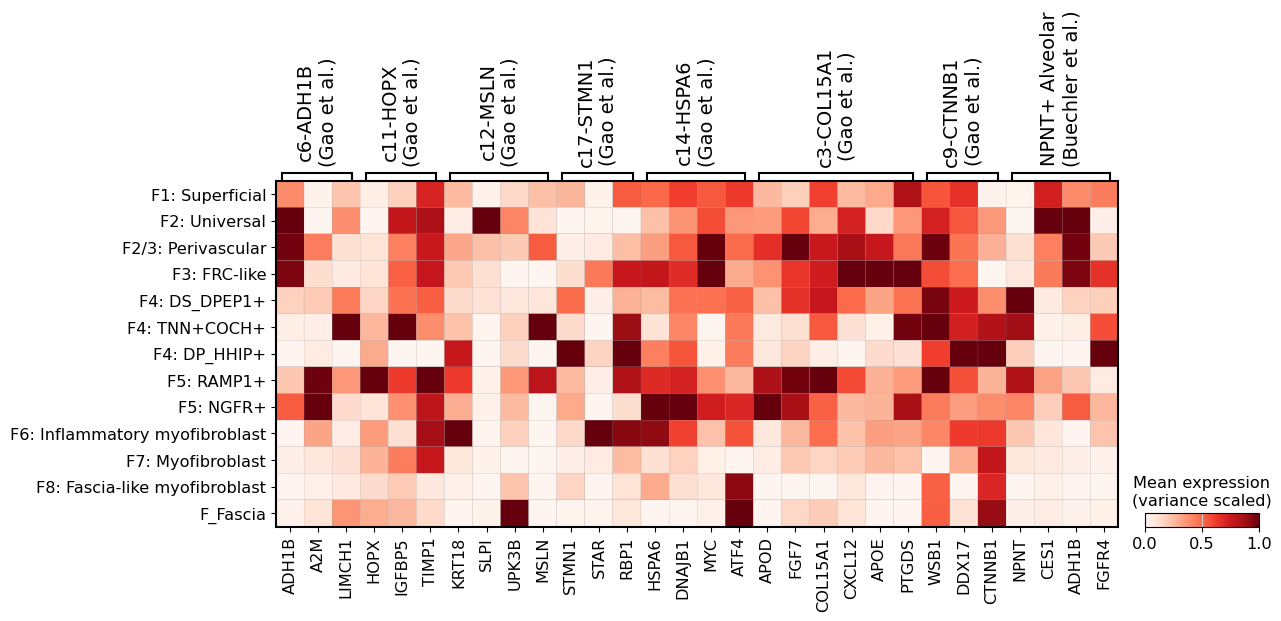

In [8]:
sc.pl.matrixplot(
    adata_lesional,
    GAO_ALL_NOT_IN_MAIN_PLOT,
    groupby="test13",
      #vmax=1.1,
    colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    dendrogram=False,
        save="fig8a_supp_extra.pdf",

    cmap="Reds"
) 

In [9]:
import gc
del(adata_lesional)
gc.collect()

19278

# ibd joint integration

In [10]:
sc.settings.figdir = "sfig9"

In [11]:
#PATH = '/nfs/team298/ls34/fibroblast_atlas/fig1/adata_skin_gut_adultonly.h5ad.integratednormalised.integratednormalised.didimprove.updatednames.v2'
PATH = '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_ibdsarah_skinjoint.h5ad'

adata_ibd = sc.read_h5ad(PATH)

In [12]:
pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)

In [13]:
mapping_dict=adata_ibd.obs["test12"].to_dict()
save_path = '/nfs/team298/ls34/ibd_fb_labels.pkl'

with open(save_path, 'wb') as f:
    pickle.dump(mapping_dict, f)

In [14]:
VMAX_VAL=0.7
DOTMAX_VAL=0.8



/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1107: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to

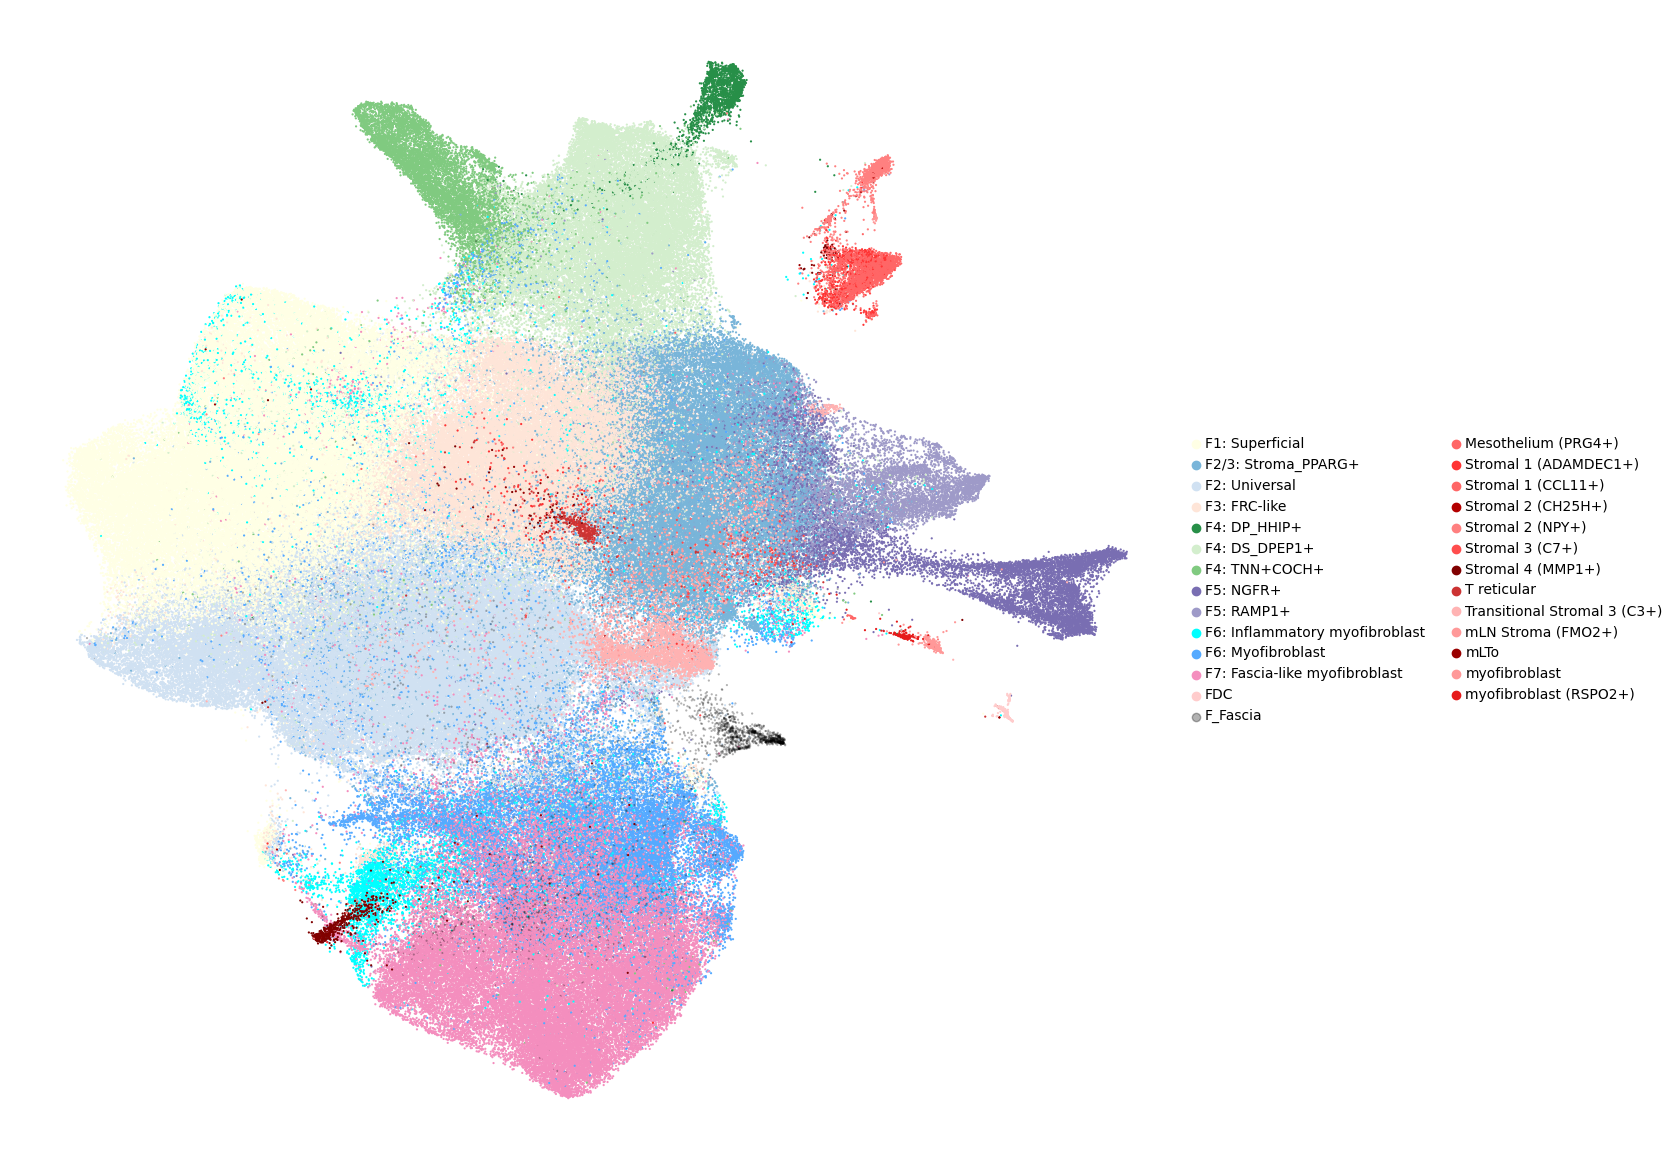

In [15]:
sc.pl.umap(
    adata_ibd,
    color="test12",
    #legend_loc="on data",
    vmax=0.8,
    s=10,
    legend_fontsize=10,
    title='',
    save="suppfig5_umap_all_intestine_skin_legend.pdf"
)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


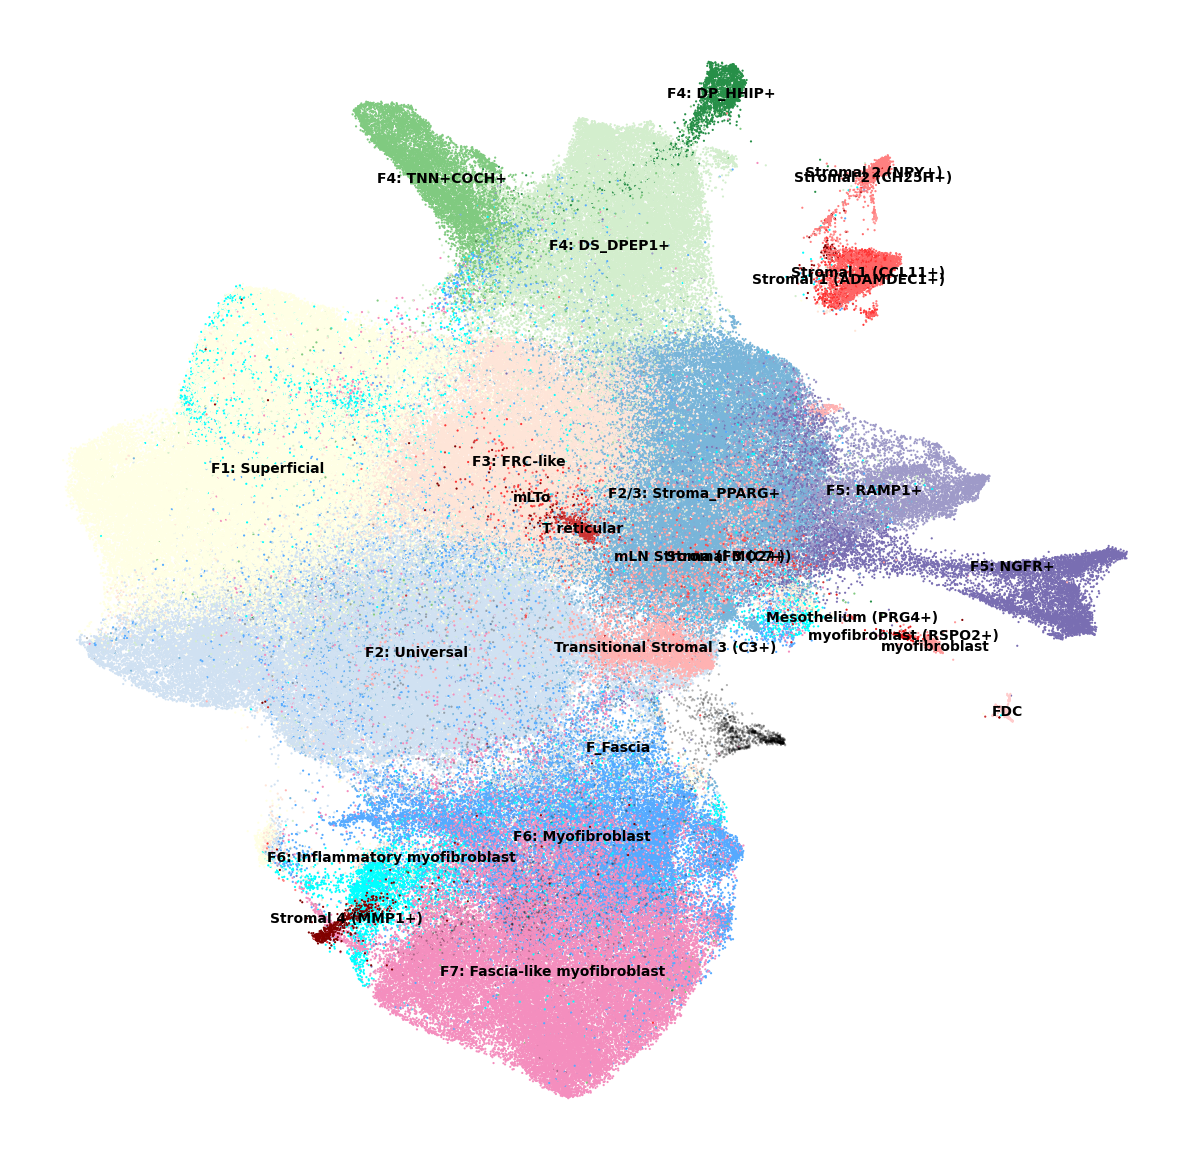

In [16]:
sc.pl.umap(
    adata_ibd,
    color="test12",
    legend_loc="on data",
    vmax=0.8,
    s=10,
    legend_fontsize=10,
    title='',
    save="sfig9c_umap_all_intestine_skin.pdf"
)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


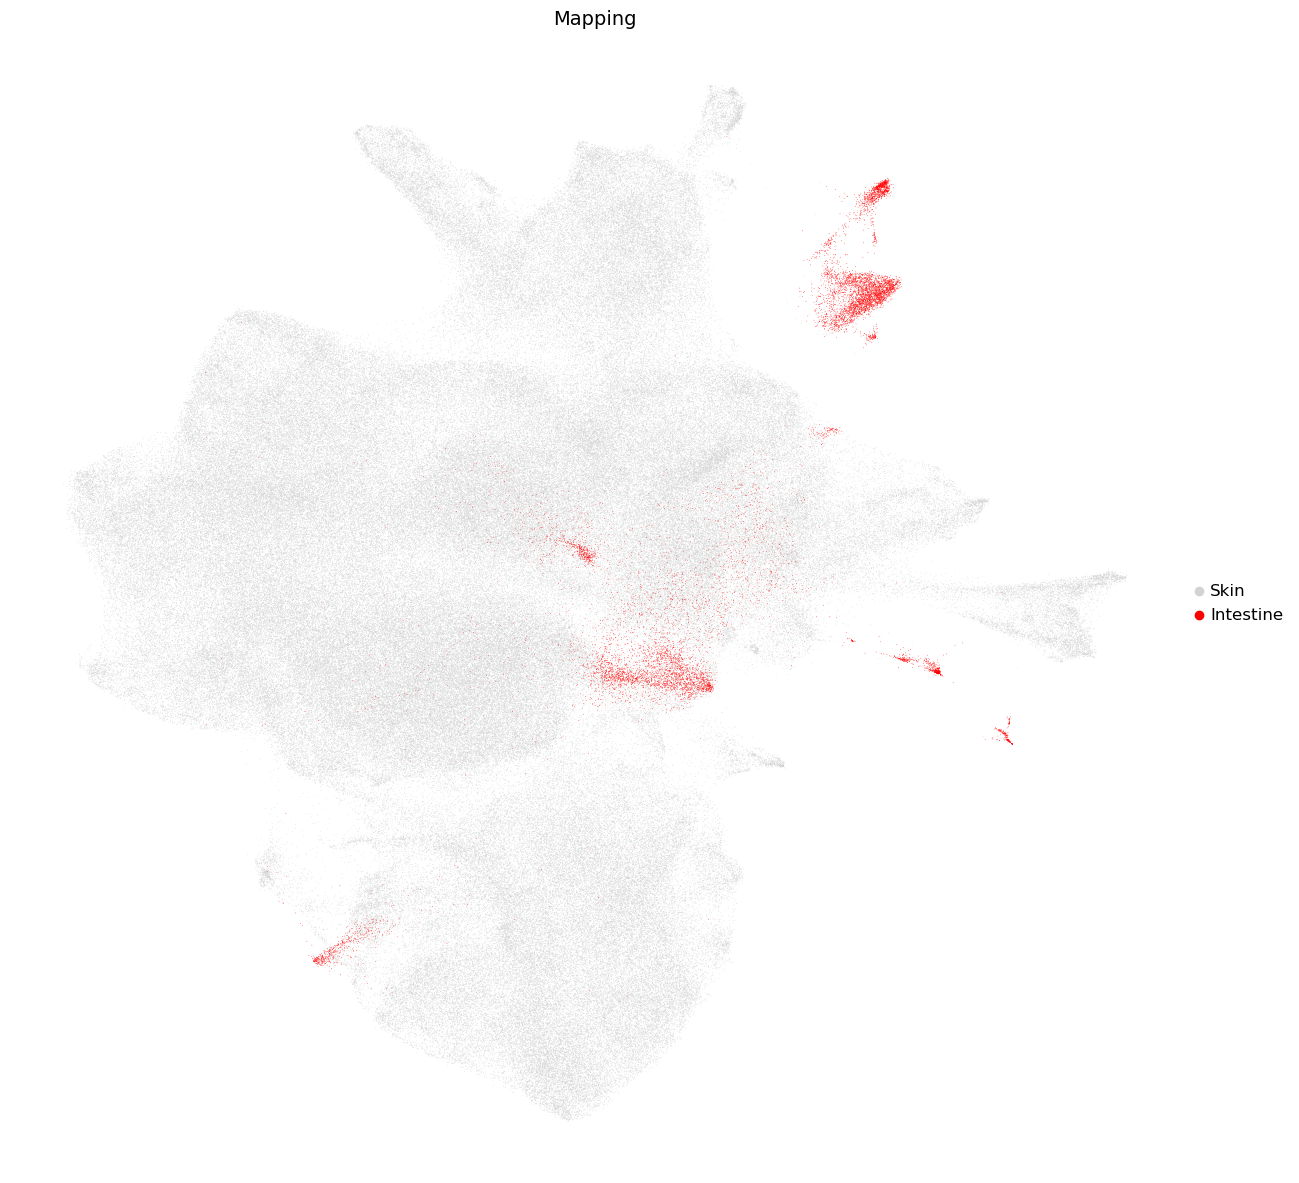

In [17]:
sc.pl.umap(
    adata_ibd,
    color="Mapping",
    #legend_loc="on data",
    vmax=0.8,
    s=1,
    legend_fontsize=12,
    save="sfig9_c2.pdf"
)

In [18]:
# VMAX_VAL=0.7
# DOTMAX_VAL=0.8

# #CROSSTISSUE_MMP1 = ["MMP1", "COL7A1", "WNT5A", "ISG15", "IL7R", "B2M", "SOD2", "ISG15", "ICAM1", "CXCL1", "CD74", "ICAM1", "TWIST1", "CCL11"]
# sc.pl.dotplot(
#     adata_ibd,
#     reynolds_short_final["F2/3"],
#     groupby="test15",
#     #standard_scale="var",
#     vmax=VMAX_VAL,
#     dot_max=DOTMAX_VAL,
#     colorbar_title='Mean expression\n(log1p norm)',
#     cmap="Reds",
#     categories_order=["F6: Inflammatory myofibroblast", "Stromal 4 (MMP1+)", "Skin_other", "Intestine_other"],
#        # save="fig4c_ibd_myofb_comparison.png"
# )

In [19]:
# RENAME = {'F1: Superficial': 'Skin_other',
#  'F2: Universal': 'Skin_other',
#  'F3: FRC-like': 'Skin_other',
#  'F4: DS_DPEP1+':'Skin_other',
#  'F4: TNN+COCH+': 'Skin_other',
#  'F2/3: Stroma_PPARG+': 'F2/3: Perivascular',
#  'F5: NGFR+':'Skin_other',
#  'F4: DP_HHIP+': 'Skin_other',
#  'F5: RAMP1+': 'Skin_other',
#  'F_Fascia':'Skin_other',
#  'F7: Fascia-like myofibroblast': 'Skin_other',
#  'F6: Myofibroblast':'Skin_other',
#  'F6: Inflammatory myofibroblast': 'Skin_other',
#  'FDC': 'Intestine_other',
#  'myofibroblast': 'Intestine_other',
#  'Stromal 1 (CCL11+)': 'Intestine_other',
#  'Stromal 1 (ADAMDEC1+)': 'Intestine_other',
#  'T reticular': 'Intestine_other',
#  'mLTo':'Intestine_other',
#  'Stromal 2 (NPY+)': 'Intestine_other',
#  'Stromal 3 (C7+)': 'Stromal 3 (C7+)',
#  'myofibroblast (RSPO2+)': 'Intestine_other',
#  'Stromal 2 (CH25H+)': 'Intestine_other',
#  'Stromal 4 (MMP1+)': 'Intestine_other',
#  'Transitional Stromal 3 (C3+)': 'Transitional Stromal 3 (C3+)',
#  'mLN Stroma (FMO2+)': 'mLN Stroma (FMO2+)',
#  'Mesothelium (PRG4+)': 'Intestine_other'
# }
# adata_ibd.obs["test_f23"]  = adata_ibd.obs["test12"].map(RENAME)
# adata_ibd.obs["test_f23"].unique()

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

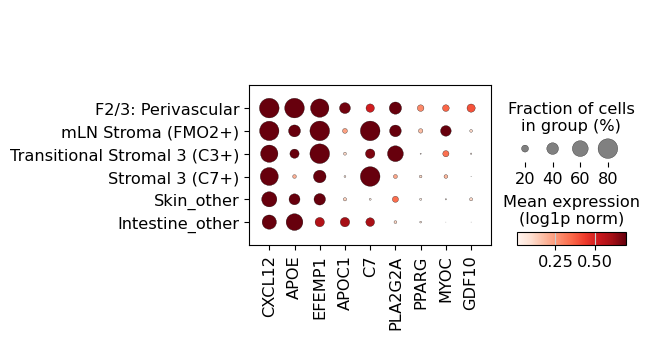

In [20]:
VMAX_VAL=0.7
DOTMAX_VAL=0.8

#CROSSTISSUE_MMP1 = ["MMP1", "COL7A1", "WNT5A", "ISG15", "IL7R", "B2M", "SOD2", "ISG15", "ICAM1", "CXCL1", "CD74", "ICAM1", "TWIST1", "CCL11"]
sc.pl.dotplot(
    adata_ibd,
    reynolds_short_final["F2/3"], #reynolds_short_final["F2: Universal"] + 
    groupby="test_f23",
    #standard_scale="var",
    vmax=VMAX_VAL,
    dot_max=DOTMAX_VAL,
    colorbar_title='Mean expression\n(log1p norm)',
    cmap="Reds",
    categories_order=[ 'F2/3: Perivascular',   'mLN Stroma (FMO2+)', 
     'Transitional Stromal 3 (C3+)',
      'Stromal 3 (C7+)',   'Skin_other', 'Intestine_other',],
     save="9c_perivasc.pdf"
    
)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

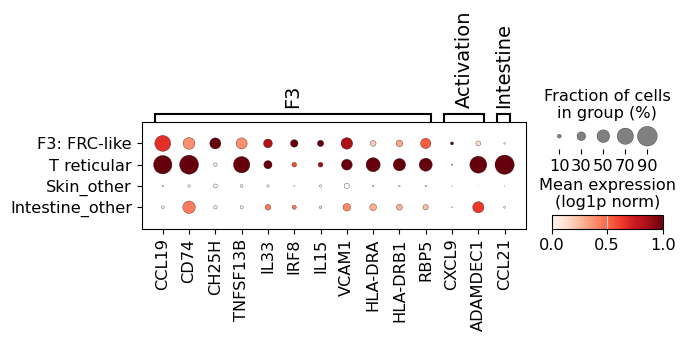

In [21]:
F3_GENES=    {"F3": ["CCL19", "CD74","CH25H", "TNFSF13B", "IL33",  "IRF8", "IL15", "VCAM1",
                     "HLA-DRA",  "HLA-DRB1", "RBP5", ],

                    "Activation" : ['CXCL9', 'ADAMDEC1', ],
              "Intestine": ["CCL21"]
             }
sc.pl.dotplot(
    adata_ibd,
    F3_GENES, #reynolds_short_final["F2: Universal"] + 
    groupby="test16",
    standard_scale="var",
    #vmax=VMAX_VAL,
    #dot_max=DOTMAX_VAL,
    colorbar_title='Mean expression\n(log1p norm)',
    cmap="Reds",
         categories_order=[ 'F3: FRC-like', 'T reticular', 'Skin_other','Intestine_other'],
         save="s9c_f3.pdf"
)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

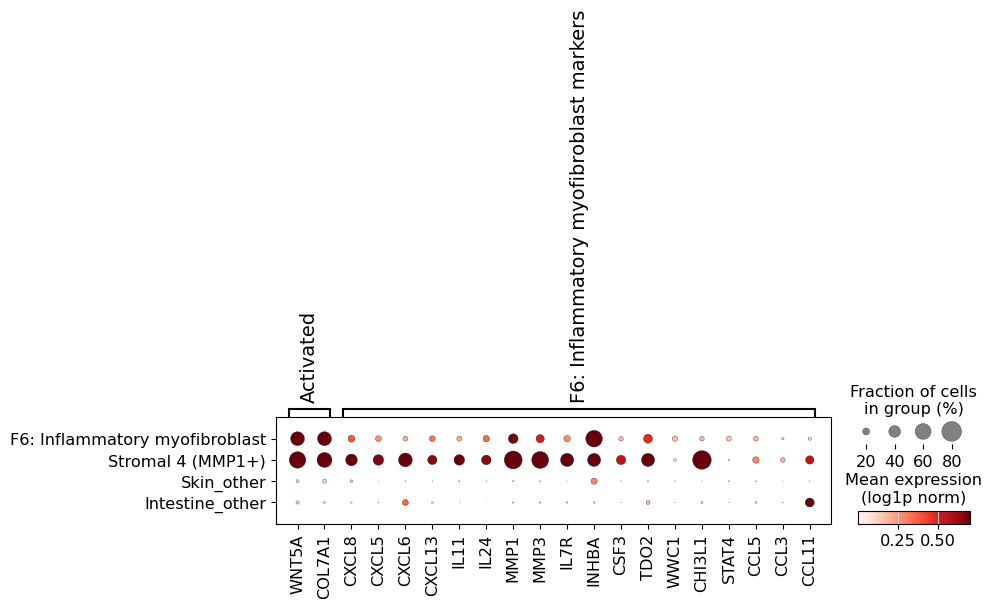

In [22]:
GAO_MMP1 = {"Activated": ["WNT5A",  "COL7A1",],
            "F6: Inflammatory myofibroblast markers" : ["CXCL8",    'CXCL5', "CXCL6",   'CXCL13' ,
                                                        'IL11', "IL24", 
                                                        "MMP1", "MMP3",
                                                         "IL7R",  "INHBA", "CSF3", "TDO2",
                                                        "WWC1", "CHI3L1", "STAT4", "CCL5", "CCL3", "CCL11"
                                                        ]
           }

            
sc.pl.dotplot(
    adata_ibd,
    GAO_MMP1,
    groupby="test15",
    #standard_scale="var",
    vmax=VMAX_VAL,
    dot_max=DOTMAX_VAL,
    colorbar_title='Mean expression\n(log1p norm)',
    cmap="Reds",
    categories_order=["F6: Inflammatory myofibroblast", "Stromal 4 (MMP1+)", "Skin_other", "Intestine_other"],
        save="sfig9c_f6.pdf"

)



# sfig 9b + 9d + 9e

In [23]:
"""
see fig6_crosstissue_dfig8.ipynb
"""

'\nsee fig6_crosstissue_dfig8.ipynb\n'

In [24]:
sc.logging.print_versions()




-----
anndata     0.10.6
scanpy      1.9.8
-----
PIL                         9.5.0
anyio                       NA
arrow                       1.3.0
asciitree                   NA
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.14.0
backcall                    0.2.0
bottleneck                  1.3.7
certifi                     2023.07.22
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.1.0
cloudpickle                 3.0.0
colorama                    0.4.6
cycler                      0.10.0
cython_runtime              NA
dask                        2024.2.0
dateutil                    2.8.2
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
dill                        0.3.8
entrypoints                 0.4
exceptiongroup              1.1.1
executing                   1.2.0
fastjsonschema              NA
fon